In [163]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv1D, LSTM, Input, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [131]:
df_sales_train = pd.read_csv('./dataset/sales_train.csv')
df_sample_submission = pd.read_csv('./dataset/sample_submission.csv')
df_test = pd.read_csv('./dataset/test.csv')

In [132]:
df_sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


test 데이터 셋을 보면
id, shop_id, item_id로 구성되어있다.

이들을 전처리하려면 
shop_id 별, item_id 별로 처리해야할까???


In [133]:
df_sales_train['date'] = pd.to_datetime(df_sales_train['date'], infer_datetime_format= True, 
                                        dayfirst=True)

In [134]:
df_sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0
2935845,2015-10-09,33,25,7460,299.00,1.0
2935846,2015-10-14,33,25,7459,349.00,1.0
2935847,2015-10-22,33,25,7440,299.00,1.0


In [135]:
df_sales_train = df_sales_train.sort_values(by=['date', 'item_id'])

In [136]:
df_sales_train.drop(columns='item_price', inplace=True)

In [137]:
df_sales_train

,date,date_block_num,shop_id,item_id,item_cnt_day
17055,2013-01-01,0,28,32,1.0
23613,2013-01-01,0,27,32,1.0
83947,2013-01-01,0,54,32,2.0
107345,2013-01-01,0,38,32,1.0
111601,2013-01-01,0,42,32,1.0
...,...,...,...,...,...
2924948,2015-10-31,33,25,22118,1.0
2909023,2015-10-31,33,15,22139,1.0
2903578,2015-10-31,33,42,22145,1.0
2903582,2015-10-31,33,42,22167,1.0


In [138]:
shop_id_list = df_sales_train['shop_id'].value_counts().index

In [139]:
df_sales_train = df_sales_train.sort_values(by=['date'])
df_sales_train

,date,date_block_num,shop_id,item_id,item_cnt_day
17055,2013-01-01,0,28,32,1.0
56142,2013-01-01,0,7,13927,1.0
26642,2013-01-01,0,27,13901,1.0
21548,2013-01-01,0,28,13901,2.0
86159,2013-01-01,0,54,13891,1.0
...,...,...,...,...,...
2883713,2015-10-31,33,46,6727,1.0
2904117,2015-10-31,33,47,6727,1.0
2889689,2015-10-31,33,35,6728,1.0
2925411,2015-10-31,33,31,7007,1.0


In [140]:
df_sales_train = df_sales_train.reset_index()

In [141]:
df_sales_train.drop(columns='index', inplace=True)

In [142]:
df_sales_train = df_sales_train.drop(columns=['date_block_num', 'date']  )

In [143]:
df_sales_train['ID'] = [i for i in range(len(df_sales_train))]

In [166]:
df_sales_train = df_sales_train.reindex(columns=['ID', 'shop_id', 'item_id', 'item_cnt_day'])

In [150]:
model = LinearRegression()

train_x, test_x, train_y, test_y =train_test_split(df_sales_train.iloc[:,:-1], df_sales_train.iloc[:,-1],
                                                   test_size=0.7,
                                                  random_state=True)

In [151]:
model.fit(train_x, train_y)

LinearRegression()

In [153]:
pred_y = model.predict(test_x)

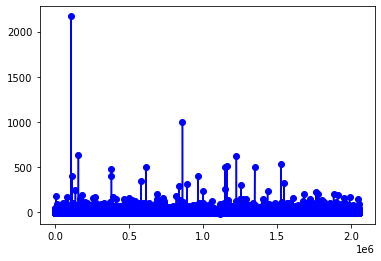

In [158]:
plt.plot(range(len(test_x)), pred_y, marker = 'o', color = 'red')
plt.plot(range(len(test_x)), test_y, marker = 'o', color = 'blue')


In [164]:
mse(test_y, pred_y)

7.539274353544186

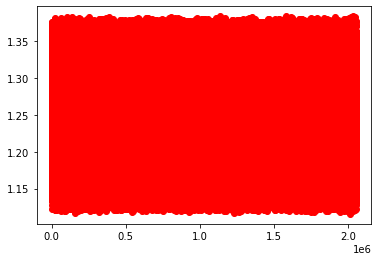

In [165]:
plt.plot(range(len(test_x)), pred_y, marker = 'o', color = 'red')

In [179]:
asdf = df_sales_train[(df_sales_train['shop_id'] == 59)]

In [180]:
asdf[(asdf['item_id'] == 13418)]

,ID,shop_id,item_id,item_cnt_day
1737,1737,59,13418,1.0
20630,20630,59,13418,1.0
39709,39709,59,13418,1.0
77435,77435,59,13418,1.0
113529,113529,59,13418,1.0
124393,124393,59,13418,1.0
180354,180354,59,13418,1.0
208810,208810,59,13418,1.0
221613,221613,59,13418,1.0
309303,309303,59,13418,1.0
